In [135]:
import os
from os import path
from munging import load_data

path_name = path.join(path.abspath('..'), 'data')
file_name = 'Notif.xlsx'
sht_name = 'All Notifications_2010-2016'

data_file = path.join(path_name, file_name)

df = load_data(data_file, sht_name)

In [137]:
df.head()

,Notification,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Priority,Priority Code,Description.1,User status,System status,Cause code text,City,Malfunct. start,Malfunct.end,Location
0,301049381,2011-05-20,2011,MNWORK,CHCK,MNREQUST,CUST,MNOBJECT,PIPE,00900834,...,NaN,SP,PIP 89 DRILLSHOT,INI NORD,NOCO NOPT,Customer Request,CAPEL,2011-05-20,2011-05-24,BS
1,301116137,2011-12-01,2011,MNWORK,CHCK,MNREQUST,AGAS,MNOBJECT,PIPE,00895059,...,NaN,SP,PIP 18 Access Rights Mandurah Gas Latera,INI,NOCO ORAS,AGN Request,PINJARRA,2011-12-01,NaT,MA
2,301630883,2015-08-17,2015,SNSERSTD,NEW,NaN,NaN,MNOBJECT,PIPE,01007110,...,NaN,SN,9 SLAB INSTALLATION,INI,OSNO,NaN,BASSENDEAN,2015-08-17,NaT,NM
3,300943307,2010-06-13,2010,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,00876628,...,NaN,SP,PIP ****SITE VISIT****,INI NORD,ATCO NOCO,3rd Party Intervention,WANGARA,2010-06-07,2010-06-08,NM
4,301079516,2011-08-16,2011,MNWORK,CHCK,MNREQUST,CUST,MNOBJECT,PIPE,00898718,...,NaN,SP,PIP 1016 EXCAVTION,INI NORD,NOCO NOPT,Customer Request,ALKIMOS,2011-08-17,2011-08-17,NM


In [3]:
cellVal = df.iloc[2] # get individual row
cellVal['Notification'] # get individual value from row


301630883

In [4]:
df.groupby('Damage Code').count()

,Notification,Notif.date,Notification Year,Code group,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,Description,...,Priority,Priority Code,Description.1,User status,System status,Cause code text,City,Malfunct. start,Malfunct.end,Location
Damage Code,,,,,,,,,,,,,,,,,,,,,
ALTR,851,851,851,851,815,815,851,851,851,851,...,851,851,851,851,851,815,851,851,566,851
BROK,913,913,913,913,913,913,913,913,913,913,...,913,913,913,913,913,913,913,913,904,913
CALI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CHCK,11669,11669,11669,11669,11650,11650,11669,11669,11669,11669,...,11665,11669,11669,11669,11669,11650,11667,11666,10139,11669
DAMG,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,45,115
DEFC,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,67,78
DEMO,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,103,104
DEPL,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,1,4
DISC,90,90,90,90,77,77,90,90,90,90,...,89,90,90,90,90,77,90,90,78,90


In [5]:
grp = df.groupby(['Notification Year','Damage Code','ObjectPartCode'])['Notification'].count()
grp

Notification Year  Damage Code  ObjectPartCode
2010               ALTR         ANOD                 1
                                CPPT                 2
                                PIPE                99
                   BROK         PIPE               190
                                TAPP                 2
                   CALI         PIPE                 1
                   CHCK         ANOD                 8
                                EART                 1
                                MNVV                 6
                                PIPE              2011
                                POMD                 1
                                SIGN                 1
                                TBCO                 1
                   DEFC         ANOD                36
                                PIPE                22
                   DEMO         PIPE                15
                   DISC         PIPE                17
                  

In [6]:
#pivot = df.pivot_table('Notification', index=['Damage Code','Cause code','ObjectPartCode'], columns='Notification Year', aggfunc='count')
pivot = df.pivot_table('Notification', index='Type', columns='Notifictn type', aggfunc='count')
pivot

Notifictn type,SF,SM,SN,SP
Type,,,,
CS,23.0,NaN,NaN,23.0
DS,116.0,NaN,1.0,35.0
MN,7235.0,1.0,224.0,15264.0
MP/LP Mains - Mount Pleasant,NaN,1.0,NaN,NaN
MP/LP Mains - North Lake,NaN,1.0,NaN,NaN
MS,2.0,NaN,NaN,NaN
Mains - High Pressure - Maintenance,NaN,5.0,NaN,NaN
PI,3.0,2.0,NaN,43.0
PR,3.0,NaN,1.0,5.0


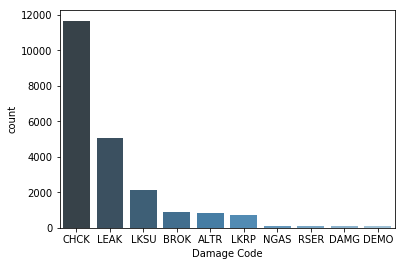

In [9]:
import seaborn
seaborn.countplot(df['Damage Code'],
                  palette="Blues_d",
                  order=df['Damage Code'].value_counts().iloc[:10].index
                 )


In [8]:
for cat, subcategories in df.groupby('Damage Code'):
    #print (cat)
    pass

In [10]:
import pandas as pd

accumulated_df = []
for cat, subcategories in df.groupby('Damage Code'):

    if cat=='CHCK' or cat=='LEAK' or cat=='LKSU':
        #print(cat)
        timeseries = pd.DataFrame.from_records([
            { 'year': year, 'count': len(year_df), 'code': cat}
            for year, year_df in subcategories.groupby('Notification Year')
        ])
    
        #print(timeseries)
        
        accumulated_df.append(timeseries)
#print(accumulated_df)
    #seaborn.barplot(x='year', y='count',
    #                data=timeseries,
    #               palette='Blues_d')

#print(timeseries)
#g = seaborn.FacetGrid(accumulated_df, col=cat, height=4, aspect=.5)
#g.map(seaborn.barplot, 'year', 'count')


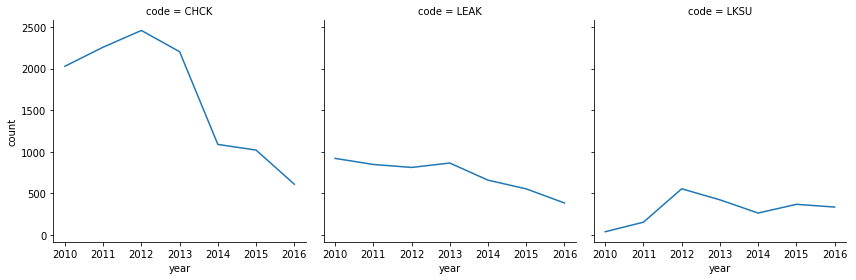

In [11]:
import pandas as pd

annual_data=[]
labels = ['code','year', 'count']

for cat, subcategories in df.groupby('Damage Code'):
    if cat=='CHCK' or cat=='LEAK' or cat=='LKSU':
        for year, year_df in subcategories.groupby('Notification Year'):
            new_data=[cat, year, len(year_df)]
            annual_data.append(new_data)
        
output = pd.DataFrame.from_records(annual_data, columns=labels)
#print(output)
g = seaborn.FacetGrid(output, col='code', height=4, aspect=1, col_wrap=3)
g.map(seaborn.lineplot, 'year', 'count')

In [2]:
import os
from os import path
from munging import load_data

path_name = path.join(path.abspath('..'), 'data')
file_name = 'Notif.xlsx'
sht_name = 'All Notifications_2010-2016'
data_file = path.join(path_name, file_name)

df = load_data(data_file, sht_name)

C:\Users\tdavi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


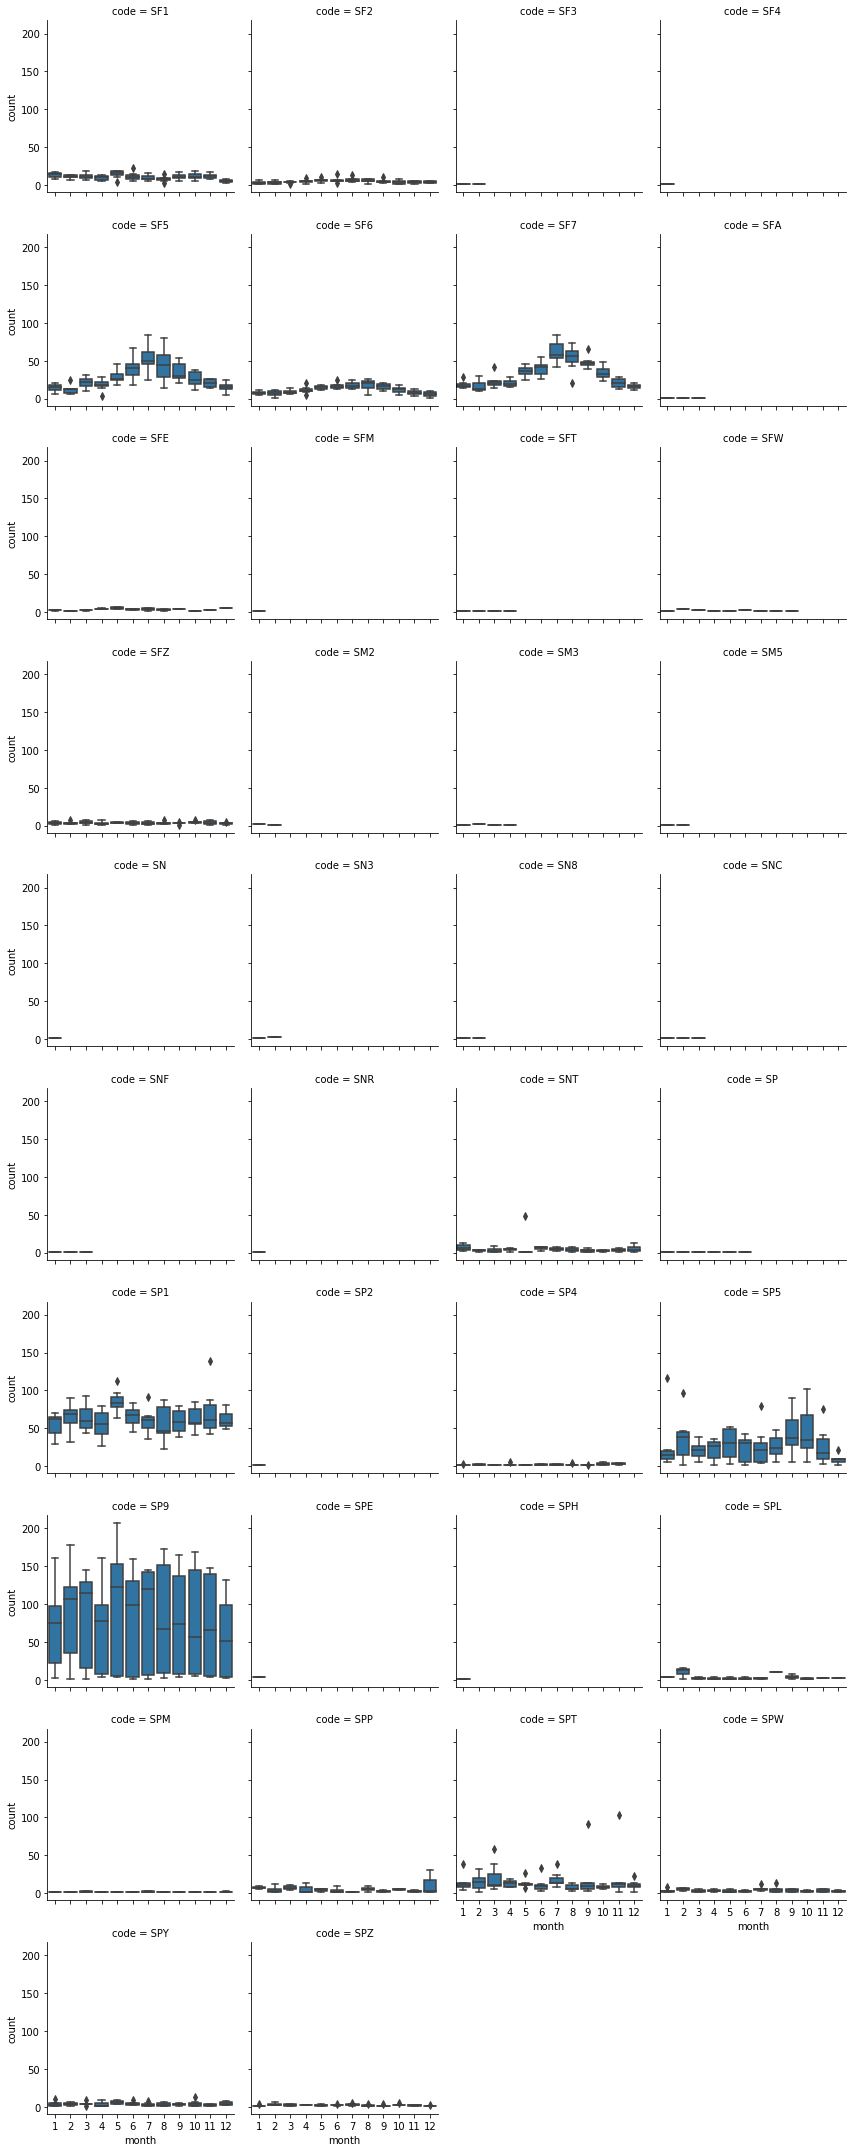

In [26]:
import pandas as pd
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime

new_df = df[['Notif.date','Priority Code','Notification Year']]
new_df.set_index('Notif.date')

monthly_data=[]
labels = ['code','year', 'month', 'count']

for cat, subcategories in new_df.groupby('Priority Code'):
    #if cat=='SF5'or cat=='SF1' or cat=='SF2' or cat=='SF3' or cat=='SF4':
    job_type = cat
    for yr, year_df in subcategories.groupby('Notification Year'):
        for mnth, month_df in year_df.groupby(df['Notif.date'].dt.month):
            new_data=[cat, yr, mnth, len(month_df)]
            #print(new_data)
            monthly_data.append(new_data)
            
       
output = pd.DataFrame.from_records(monthly_data, columns=labels)
#print(output.head(20))

# plot boxplot with seaborn
#bplot=sns.boxplot(y='count', x='month', 
#                 data=output, 
#                 width=0.5,
#                 palette="colorblind")
 
# add swarmplot
#bplot=sns.swarmplot(y='count', x='month',
#              data=output, 
#              color='black',
#              alpha=0.75)

# format plot
#bplot.axes.set_title("Seasonal Analysis - "+job_type, fontsize=16)
#bplot.set_xlabel("Month", fontsize=14)
#bplot.set_ylabel("Count", fontsize=14)
#bplot.tick_params(labelsize=10)

g = sns.FacetGrid(output, col='code',  aspect=1, col_wrap=4)
g.map(sns.boxplot, 'month', 'count')

In [101]:
#data = df(['Notif.date','Damage Code', 'Duration'])
#grp = df.groupby(['Notif.date','Damage Code'])
#grp.set_index('Notif.date')

#grp = pd.concat([df['Notif.date'], df['Damage Code']], axis=1, keys=['date', 'code'])
#print (grp)
#grp = pd.read_excel(io=data_file, 
#                   sheet_name = sht_name,
#                   usecols=['Notif.date', 'Damage Code'],
#                   index_col=0,
#                   parse_dates=[0]
#                  )

grp = pd.DataFrame({'date': df['Notif.date'],
                   'code': df['Damage Code']
                   })


#grp.set_index('date')
#print (grp)
idx = pd.MultiIndex.from_arrays([
        pd.to_datetime(grp.date.apply(lambda x: x.strftime('2012-%m-%d'))),
        grp.date.year
    ])
print (idx)
ax = grp.set_index(idx).unstack().plot()
print (ax)
#lg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=2)


            date  code
0     2011-05-20  CHCK
1     2011-12-01  CHCK
2     2015-08-17   NEW
3     2010-06-13  CHCK
4     2011-08-16  CHCK
5     2015-10-26  UPGD
6     2014-03-11   NaN
7     2014-08-18  DISC
8     2013-05-23  BROK
9     2014-07-10  BROK
10    2014-11-07  BROK
11    2013-08-28  BROK
12    2013-02-28  BROK
13    2013-03-01  BROK
14    2010-04-23  BROK
15    2014-04-30  BROK
16    2014-06-17  BROK
17    2013-05-21  BROK
18    2010-03-02  BROK
19    2010-08-04  BROK
20    2010-11-02  BROK
21    2013-02-28  BROK
22    2012-02-10  BROK
23    2016-05-11  BROK
24    2012-04-02  BROK
25    2012-08-27  BROK
26    2012-08-28  BROK
27    2014-05-09  BROK
28    2012-10-09  BROK
29    2013-06-06  BROK
...          ...   ...
22991 2015-06-02  ALTR
22992 2012-10-31  DISC
22993 2014-02-24  DEMO
22994 2010-06-18  DISC
22995 2013-07-30  DEMO
22996 2012-02-21  ALTR
22997 2015-11-04  ALTR
22998 2012-03-26  ALTR
22999 2012-05-04  ALTR
23000 2012-05-18  ALTR
23001 2013-05-20  ALTR
23002 2013-

AttributeError: 'Series' object has no attribute 'year'

AttributeError: 'list' object has no attribute 'get'

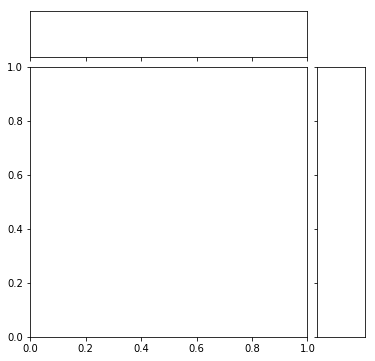

In [128]:
seaborn.jointplot('SP9', 'year', accumulated_df, kind='hex')

In [126]:
agg_by_year = pd.concat(accumulated_df)

seaborn.countplot(agg_by_year['SP9'],
                  palette="Blues_d",
                  order=agg_by_year['SP9'].value_counts().iloc[:10].index
                 )

KeyError: 'SP9'

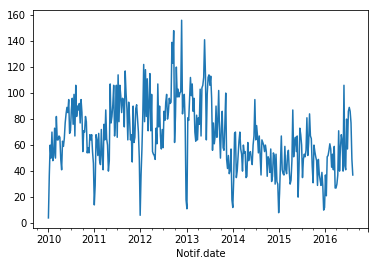

In [113]:
df.set_index('Notif.date').resample('W')['Notification'].count().plot()

In [119]:
subsets = {categories: subcategories for categories, subcategories in df.groupby('Priority Code')}
top_subset = [subsets['SP9'], subsets['Notification Year']]

#seaborn.jointplot(top_subset,'Notification Year', df)
seaborn.countplot(top_subset,
                  palette="Blues_d",
                  order=df['Notification Year'].value_counts().iloc[:10].index
                 )
#seaborn.jointplot(df['Priority Code']['SP9'],'Notification Year', df)

KeyError: 'Notification Year'

C:\Users\tdavies\AppData\Local\conda\conda\envs\MY_Week_02\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tdavies\AppData\Local\conda\conda\envs\MY_Week_02\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


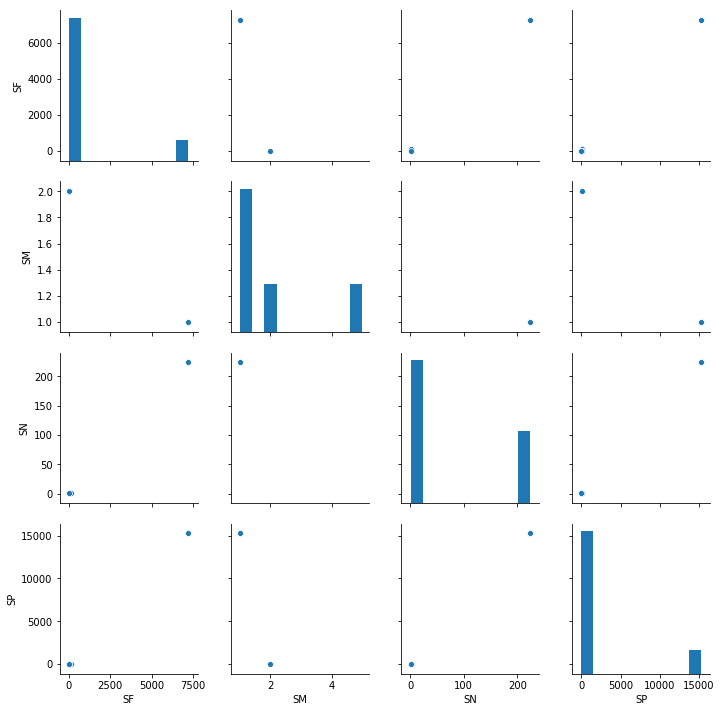

In [59]:
seaborn.pairplot(pivot)

C:\Users\tdavies\AppData\Local\conda\conda\envs\MY_Week_02\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


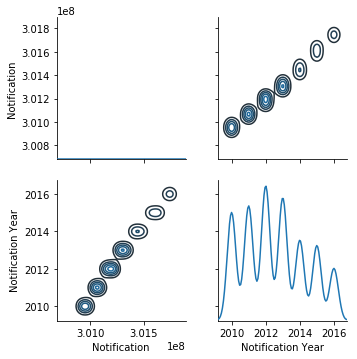

In [24]:
g = seaborn.PairGrid(df)
g.map_diag(seaborn.kdeplot)
g.map_offdiag(seaborn.kdeplot, n_levels=6);